# Winequality dataset

Julià Wallis Medina, DNI: 43197070B\
Dawid Michal Roch Móll, NIE: X5874192S\
Joan Sansó Pericàs, DNI: 41658982W

|        package | version |
|---------------:|---------|
| python         | 3.9.7   |
| numpy          | 1.21.2  |
| matplotlib     | 3.4.3   |
| pandas         | 1.3.4   |
| scikit-learn   | 1.0.1   |
| jupyter-lab    | 3.2.1   |
| seaborn        | 0.11.0  |
| feature-engine | 1.2.0   |

En aquest arxiu resoldrem la pràctica tractant els valors de qualitat com a Categòrics (Baixa-Mitjana-Alta)

## Feim els imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE
from feature_engine.creation import MathematicalCombination, CombineWithReferenceFeature

## Preparam el dataset

En aquest apartat, unirem els dos datasets en un i el prepararem per tal de poder emprar-lo posteriorment

Funció que separa les features i les etiquetes, escalant les dades

In [2]:
def load_data(df):
    y=df.quality
    X=df.drop('quality',axis=1)
    X = min_max_scaler.fit_transform(X)
    return X, y

Carregam els datasets a dos dataframes a partir dels fitxers .csv: winequality-red.csv i winequality-white.csv

Afegim una nova columna que indiqui el tipus de vi a cada dataset i juntam els dos datasets en un de nou

In [3]:
dfRed=pd.read_csv("winequality-red.csv", sep=";")
dfWhite=pd.read_csv("winequality-white.csv", sep=";")

dfRed['type']="Red"
dfWhite['type']="White"
df = pd.concat([dfRed,dfWhite])

Consultam les files del dataframe amb valors absents, no fa falta que eliminem cap ja que no n'hi ha cap amb valors absents

In [4]:
df[df.isna().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


Convertim la columna quality en una columna de valors categòrics

In [5]:
df["quality"]=df["quality"].map(lambda x: 1 if x < 6 else 2 if x == 6 else 3)

Convertim les característiques categòriques (tipus) en númeriques

In [6]:
labelencoder = preprocessing.LabelEncoder()

df['type']=labelencoder.fit_transform(df['type'])

Recolocam les columnes per tenir la qualitat a la darrera columna. Això no fa falta fer-ho però ho feim per a que els gràfics i altres representacions visuals quedin més entendibles

In [7]:
df = df.reindex(columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                       'residual sugar', 'chlorides', 'free sulfur dioxide',
                       'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                       'alcohol', 'type', 'quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1


Amb el describe() podrem veure alguns valors estadístics per a cada columna. Com la mitjana, la desviació estàndard, els quartils, etcètera.

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.753886,1.829614
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779,0.731124
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000,2.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000,2.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,3.000000


Amb la funció info() podem veure quantes files hi ha al dataframe i el seu tipus, com veim totes les columnes consten de valors numérics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   int32  
 12  quality               6497 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 685.2 KB


## Visualització i neteja de les dades

En aquest apartat farem diverses representacións gràfiques de les dades per poder visualitzar-les i decidir si llevam alguna mostra.

Miram quants de vins de cada qualitat hi ha

In [10]:
df['quality'].value_counts()

2    2836
1    2384
3    1277
Name: quality, dtype: int64

Amb el boxplot podem veure el màxim i mínim no atípic, els quartils, el rang interquartil, la mitjana i els outliers de cada característica

<AxesSubplot:>

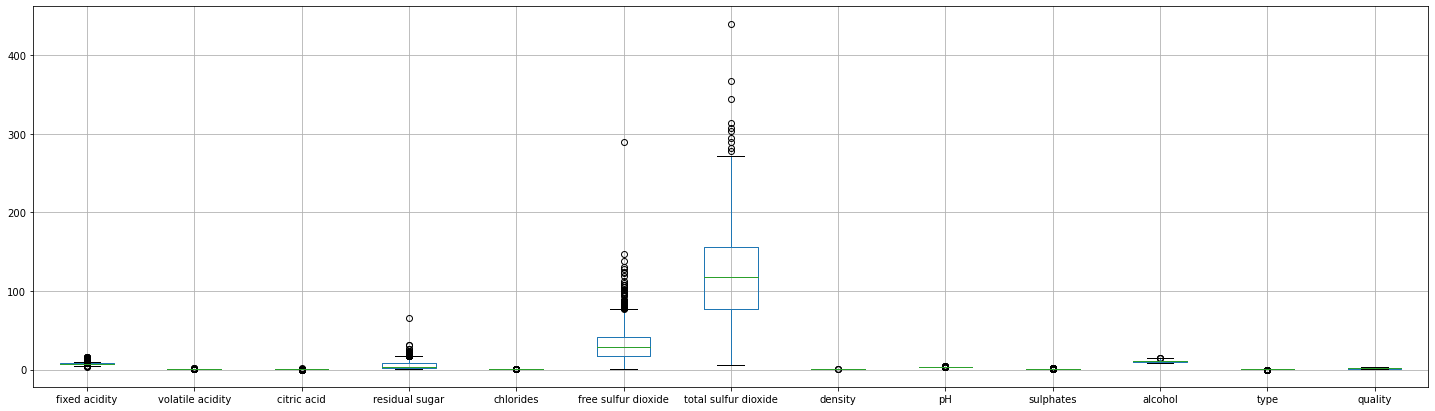

In [11]:
df.boxplot(figsize=(25,7))

Com podem veure tenim molts d'outliers, així que eliminarem els valors que estiguin per davall del percentil 0.5% i per damunt del 99.5%

Una altra manera de fer-ho és amb el següent codi que empra una fórmula basada en el rang interquartil, però trobàvem que eliminava massa files.
```python
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
```

Forma:  (6497, 13)
Forma de després d'eliminar els outliers:  (5777, 13)


<AxesSubplot:>

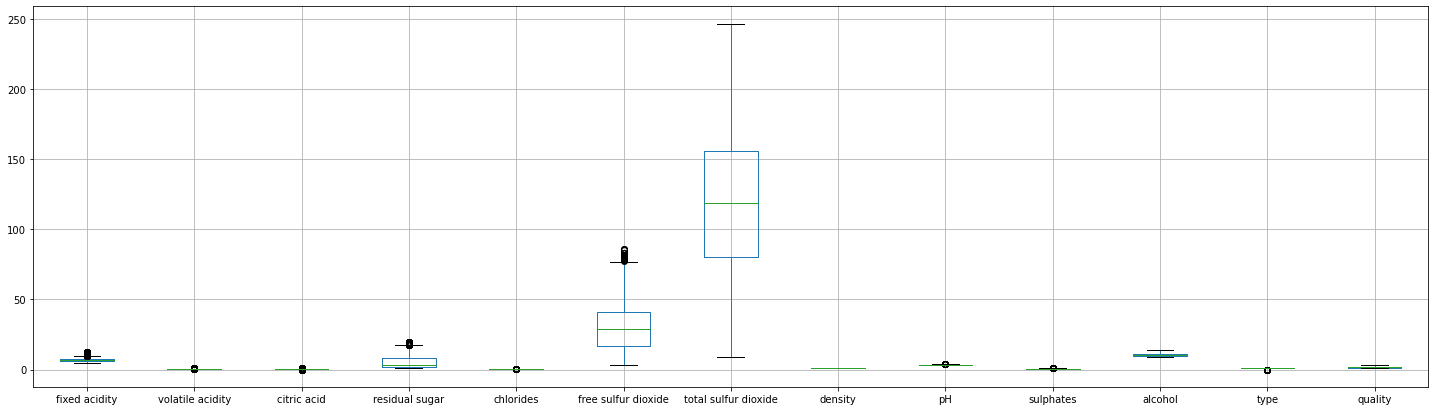

In [12]:
cols= ['fixed acidity', 'volatile acidity', 'citric acid', 
                       'residual sugar', 'chlorides', 'free sulfur dioxide',
                       'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                       'alcohol']

Q01=df.quantile(0.005)
Q99=df.quantile(0.995)

print("Forma: ",df.shape)
for col in cols:
    df = df.drop(df[((df[col] < Q01[col]) | (df[col] > Q99[col]))].index)

print("Forma de després d'eliminar els outliers: ",df.shape)
df.boxplot(figsize=(25,7))


In [13]:
df['quality'].value_counts()

2    2558
1    2101
3    1118
Name: quality, dtype: int64

Visualitzam les correlacions de les característiques entre elles amb una matriu de correlacions, això ho feim per saber quines característiques estan més o menys relacionades entre si

<AxesSubplot:>

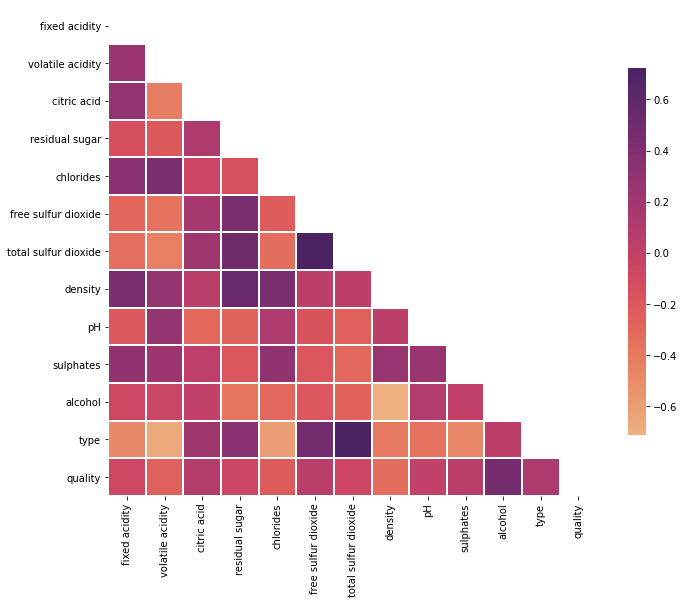

In [14]:
corr = df.corr()

# Generam una màscara pel triangle superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Preparam el gràfic de pyplot
f, ax = plt.subplots(figsize=(11, 9))

# Dibuixam el mapa de calor amb la màscara i alguns paràmetres extra per millorar el resultat visual
sns.heatmap(corr, mask=mask, cmap="flare", square=True, linewidths=.25, cbar_kws={"shrink": .75})


Graficam el valor que prenen les característiques númeriques del dataframe mitjançant un histograma

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

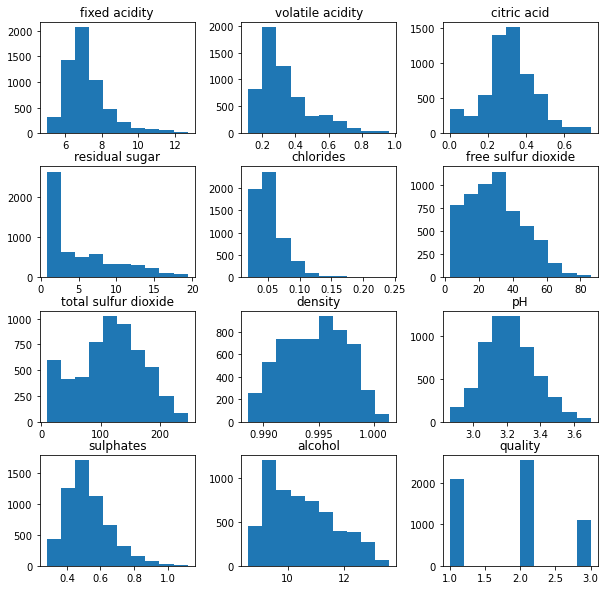

In [15]:
df.drop("type", axis=1).hist(figsize=(10,10), grid=False)

Gràfic cirular en el que podem veure la proporció de vi blanc i vermell del dataframe

1    76.458369
0    23.541631
Name: type, dtype: float64


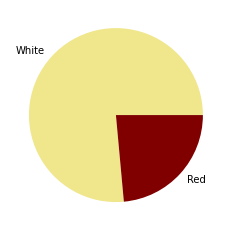

In [16]:
plt.pie(df['type'].value_counts(), labels = ["White","Red"], colors=["khaki","Maroon"])
print(df['type'].value_counts(normalize=True)*100)

## Separació del conjunt d'entrenament i el de test

Mesclam el dataframe i carregam les dades a les variables *features* (característiques) i *labels* (etiquetes).

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
df = df.sample(frac=1) #No faria faltar mesclar-ho ja que després els classificadors faran un shuffle internament.

features, labels = load_data(df)

Per separar les dades en els conjunts d'entrenament i de test hem emprat la funció train_test_split

Hem decidit emprar un 80% entrenament i un 20% de test ja que  amb un valor més baix d'entrenament el model de regressió logistica i el del perceptró presentaven *underfitting* 


In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# **Classificadors**

Per a cada model imprimim el seu classification report, la precisió de training i la de testing. A més, guardam aquests dos valors dins dos dataframes externs per després poder comparar les modificacions que farem al dataframe original.

Hem decidit fer els models dins funcions per poder cridar-les des de l'apartat d'[Enginyeria de característiques/Proves](#Proves) fora haver de reescriure el codi.

In [19]:
dfTrainAccuracy = pd.DataFrame(columns=['Regressió Logística','Perceptró','Random Forest'])
dfTestAccuracy = pd.DataFrame(columns=['Regressió Logística','Perceptró','Random Forest'])

## Regressió Logística

Hem decidit donar-li valor al hiperparàmetre max_iters perquè amb el valor per defecte no arribava a convergir.


Regressio Logística:
              precision    recall  f1-score   support

           1       0.65      0.67      0.66       403
           2       0.56      0.69      0.62       516
           3       0.61      0.28      0.38       237

    accuracy                           0.60      1156
   macro avg       0.61      0.54      0.55      1156
weighted avg       0.60      0.60      0.58      1156

training accuracy: 57.73642068816274
testing accuracy: 59.688581314878896

Confusion Matrix


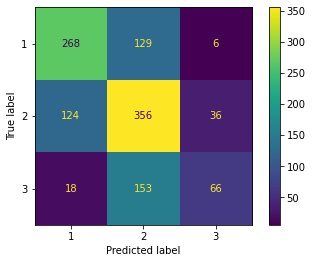

In [20]:
def RegressioLogistica(df, nom):
    #Carregam les dades del dataframe i cream les variables de Train i Test
    features, labels = load_data(df)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    #Cream una instancia del classificador
    logreg = LogisticRegression(max_iter=200)
    
    #Entrenam el classificador amb les dades de train
    logreg.fit(X_train,y_train)
    
    #Feim una predicció amb les dades de Test
    y_predict = logreg.predict(X_test)
    
    #Imprimim un classification report del test
    print("\nRegressio Logística:")
    print(classification_report(y_test, y_predict, zero_division=0))
    
    #Feim un score amb les dades de train i test per veure l'accuracy dels dos sets de dades
    training_accuracy = logreg.score(X_train,y_train)
    testing_accuracy = logreg.score(X_test,y_test)
    print('training accuracy:', training_accuracy*100)    
    print('testing accuracy:', testing_accuracy*100)
    
    #Afegim les dades a dos dataframes externs per després poder fer comparacions
    dfTrainAccuracy.at[nom,'Regressió Logística']=training_accuracy*100
    dfTestAccuracy.at[nom,'Regressió Logística']=testing_accuracy*100 
    
    #Cream una matriu de confusió amb les dades del test
    print("\nConfusion Matrix")
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=logreg.classes_), display_labels=logreg.classes_).plot()
    
    plt.show()

RegressioLogistica(df, "Original")

## Perceptró


Perceptró:
              precision    recall  f1-score   support

           1       0.45      0.81      0.58       403
           2       0.54      0.39      0.46       516
           3       0.64      0.15      0.24       237

    accuracy                           0.49      1156
   macro avg       0.54      0.45      0.42      1156
weighted avg       0.53      0.49      0.45      1156

training accuracy: 47.5871023587968
testing accuracy: 48.702422145328725

Confusion Matrix


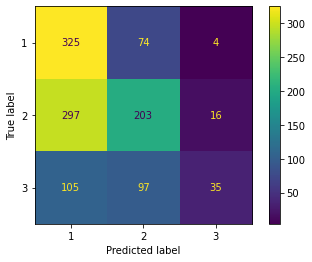

In [21]:
def Perceptro(df, nom):
    #Carregam les dades del dataframe i cream les variables de Train i Test
    features, labels = load_data(df)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    #Cream una instancia del classificador
    perceptron = Perceptron(max_iter=5000)
    
    #Entrenam el classificador amb les dades de train
    perceptron.fit(X_train,y_train)
    
    #Feim una predicció amb les dades de Test
    y_predict = perceptron.predict(X_test)
    
    #Imprimim un classification report del test
    print("\nPerceptró:")
    print(classification_report(y_test, y_predict, zero_division=0))
    
    #Feim un score amb les dades de train i test per veure l'accuracy dels dos sets de dades
    training_accuracy = perceptron.score(X_train,y_train)
    testing_accuracy = perceptron.score(X_test,y_test)
    print('training accuracy:', training_accuracy*100)    
    print('testing accuracy:', testing_accuracy*100)
    
    #Afegim les dades a dos dataframes externs per després poder fer comparacions
    dfTrainAccuracy.at[nom,'Perceptró']=training_accuracy*100
    dfTestAccuracy.at[nom,'Perceptró']=testing_accuracy*100 
    
    #Cream una matriu de confusió amb les dades del test
    print("\nConfusion Matrix")
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=perceptron.classes_), display_labels=perceptron.classes_).plot()
    
    plt.show()

Perceptro(df, "Original")

## Random Forest


Random Forest:
              precision    recall  f1-score   support

           1       0.77      0.77      0.77       403
           2       0.69      0.75      0.72       516
           3       0.75      0.62      0.68       237

    accuracy                           0.73      1156
   macro avg       0.74      0.71      0.72      1156
weighted avg       0.73      0.73      0.73      1156

training accuracy: 100.0
testing accuracy: 73.01038062283737

Confusion Matrix


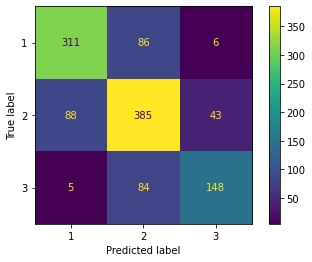

In [22]:
def RandomForest(df, nom):
    #Carregam les dades del dataframe i cream les variables de Train i Test
    features, labels = load_data(df)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    #Cream una instancia del classificador
    rf = RandomForestClassifier()
    
    #Entrenam el classificador amb les dades de train
    rf.fit(X_train,y_train)
    
    #Feim una predicció amb les dades de Test
    y_predict = rf.predict(X_test)
    
    #Imprimim un classification report del test
    print("\nRandom Forest:")
    print(classification_report(y_test, y_predict, zero_division=0))
    
    #Feim un score amb les dades de train i test per veure l'accuracy dels dos sets de dades
    training_accuracy = rf.score(X_train,y_train)
    testing_accuracy = rf.score(X_test,y_test)
    print('training accuracy:', training_accuracy*100)    
    print('testing accuracy:', testing_accuracy*100)
    
    #Afegim les dades a dos dataframes externs per després poder fer comparacions
    dfTrainAccuracy.at[nom,'Random Forest']=training_accuracy*100
    dfTestAccuracy.at[nom,'Random Forest']=testing_accuracy*100 
    
    #Cream una matriu de confusió amb les dades del test
    print("\nConfusion Matrix")
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=rf.classes_), display_labels=rf.classes_).plot()
    
    plt.show()

RandomForest(df, "Original")

## Conclusions

En aquest apartat procedirem a exposar les conclusions obtingudes després d'analitzar els resultats dels tres models amb les dades originals, que han estat prèviement normalitzades, eliminats els *outliers* majors al percentil 99.5% i menors al 0.5% i transformades les qualitats numèriques a qualitats categòriques.



A l'hora de jutjar les precisions mitjanes, es tendrà en compte la mitjana ponderada ja que la quantitat de mostres d'uns tipus de qualitat és bastant més elevada que la resta i no volem que tenguin el mateix impacte.

- **Regressió Logística**
    - Com podem observar, els vins de qualitat Baixa tenen el valor més alt de *f1-score*.
- **Perceptró**
    - El perceptró és el model de classificació que té la precisió general més baixa.
- **Random Forest**
    - Amb aquest model s'obtenen uns valors de precisió, *accuracy* i *f1-score* superiors amb diferència als altres models però es segueix mantenint la dinàmica de que els vins de qualitat Baixa tenen uns millors valors.
    - El Random Forest té un *training accuracy* del 100%, que podria ser un indicador d'*overfitting*. Això es podria solucionar amb l'hiperparàmetre *max_depth* del Random Forest, el que limitaria la profunditat de l'arbre i evitaria que el model tengués *overfitting*. Pel que fa a la matriu de confusió, es mostren valors esperables, i té el millor *f1-score* d'entre tots els altres models.

<br/>
- Pel que fa a les mitjanes de Precisió, el Random Forest és el que destaca, amb un valor de precisió mitjà del 73%. En front de les altres dues, Regressió Logística i Perceptró, amb uns valors de 60% i 53% respectivament.


# **Enginyeria de característiques**

L'enginyeria de característiques (feature engineering) és el procés de selecció, extracció, creació i transformació de les característiques d'un dataset amb l'objectiu de millorar l'eficàcia d'un model predictiu.

Per dur a terme l'enginyeria de característiques hem seguit els següents apartats: 
- **Feature importances dels models**: Ens permet saber la importància de cada característica dins cada model amb el fí d'eliminar les característiques menys importants.
- **Correlacions màximes i mínimes**: Ens permet saber quines característiques tenen major correlació entre elles. També ens permet saber quines característiques tenen menys correlació amb la qualitat del vi per després poder eliminar-les.
- **Feature Selection**: Selecció de les característiques més i menys importants. S'implementaran els següents:
   1. Sequential Feature Selection
   2. Univariate Feature Selection amb Kbest
   3. Recursive Feature Elimination

In [23]:
# Hem de necessitar un dataframe fora la qualitat, ja que els métodes que empram a continuació ens
# creen una máscara de les columnes més o menys importants de longitud columnes-1. 
# Això és degut a que el nostre dataframe inclou la qualitat però els models s'entrenen fora la qualitat
# i per tant tenen una columna menys
dfWquality=df.drop("quality", axis=1)

## Feature importances de cada model

En aquest apartat emprarem els atributs dels models de classificació desenvolupats anteriorment per triar les dues característiques amb menys importància

### Regressió logística <a id='Regressio-Logistica'></a>

Millor característica: volatile acidity
Pitjor característica alcohol


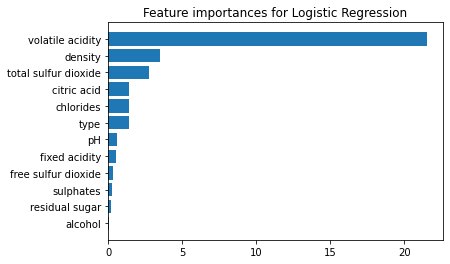

In [24]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train,y_train)

logreg_odds = np.exp(logreg.coef_[0])
indices=np.argsort(logreg_odds)

fig, ax = plt.subplots()
ax.set_title("Feature importances for Logistic Regression")
ax.barh(range(len(logreg_odds)), logreg_odds[indices])
ax.set_yticks(range(len(logreg_odds)))
_ = ax.set_yticklabels(np.array(dfWquality.columns)[indices])

print("Millor característica:", dfWquality.columns[indices][-1])
pitjorLogReg = dfWquality.columns[indices][0]
print("Pitjor característica", pitjorLogReg)

### Perceptró <a id='Perceptro'></a>

Millor característica: volatile acidity
Pitjor característica: sulphates


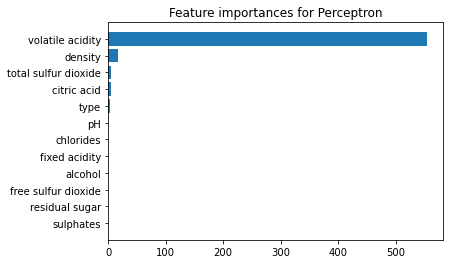

In [25]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

perceptron_odds = np.exp(perceptron.coef_[0])
indices=np.argsort(perceptron_odds)

fig, ax = plt.subplots()
ax.set_title("Feature importances for Perceptron")
ax.barh(range(len(perceptron_odds)), perceptron_odds[indices])
ax.set_yticks(range(len(perceptron_odds)))
_ = ax.set_yticklabels(np.array(dfWquality.columns)[indices])

print("Millor característica:", dfWquality.columns[indices][-1])
pitjorPerc =dfWquality.columns[indices][0]
print("Pitjor característica:", pitjorPerc)

### Random Forest <a id='Random-Forest'></a>

Millor característica: alcohol
Pitjor característica: type


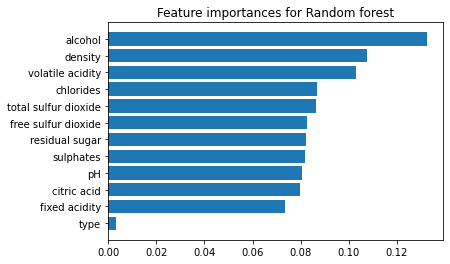

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importancesRF = rf.feature_importances_
indices = np.argsort(importancesRF)

fig, ax = plt.subplots()
ax.set_title("Feature importances for Random forest")
ax.barh(range(len(importancesRF)), importancesRF[indices])
ax.set_yticks(range(len(importancesRF)))
_ = ax.set_yticklabels(np.array(dfWquality.columns)[indices])

print("Millor característica:", dfWquality.columns[indices][-1])
pitjorRF =dfWquality.columns[indices][0]
print("Pitjor característica:", pitjorRF)

### Comparativa entre models
| Model | Millor característica | Pitjor característica |
| ----------- | ----------- | ----------- |
| Regressió Logística | Volatile Acidity | Alcohol |
| Perceptró | Free sulfur dioxide | Sulphates |
| Random Forest | Alcohol | Type |

Ens pareix curiós que a la regressió logística la pitjor característica sigui l'alcohol però al random forest és la més important.

Els resultats poden variar depenent de l'execució, aquests valors són els obtinguts a una execució determinada.

## Correlacions màximes i mínimes <a id='Correlacions-Minimes'></a>

In [27]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

print("Majors Correlacions")
print(so[13:23]) #Les 12 primeres son autocorrelacions
print("-------------")
print("Menors correlacions amb qualitat")
print(so['quality'][10:13])
pitjorsCorrelacions=so['quality'][10:13].to_dict().keys()

Majors Correlacions
free sulfur dioxide   total sulfur dioxide    0.722973
total sulfur dioxide  free sulfur dioxide     0.722973
density               alcohol                 0.710536
alcohol               density                 0.710536
type                  total sulfur dioxide    0.708479
total sulfur dioxide  type                    0.708479
type                  volatile acidity        0.665743
volatile acidity      type                    0.665743
chlorides             type                    0.606634
type                  chlorides               0.606634
dtype: float64
-------------
Menors correlacions amb qualitat
free sulfur dioxide    0.052301
residual sugar         0.050127
pH                     0.011648
dtype: float64


Les característiques que tenen la major correlació amb la qualitat són el *Free sulfur dioxide* i el *Total sulfur dioxide*, així que després provarem d'unir-les \
Les característiques que tenen la menor correlació amb la qualitat són el *pH*, *residual sugars* i *sulphates*.

## [Feature Selection](https://www.scikit-learn.org/stable/modules/feature_selection.html)

El Feature Selection és un procés de selecció de característiques que ens ajudarà a reduir la quantitat de característiques del model per deixar les més importants

### [Sequential Feature Selector](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py) <a id='Sequential-Feature-Selector'></a>


El Sequential Feature Selector funcia amb dos procediments diferents, el Forward-SFS i el Backward-SFS. 

El Forward-SFS és un procediment greedy que troba de manera iterativa la millor característica nova per afegir al conjunt de característiques seleccionades. Inicialment començam amb zero característiques i trobam la caracteristica que maximitza una calificació de cross-validation quan un estimador es entrenat amb aquesta característica concreta. Una vegada hem afegit aquesta característica repetim es procés afegint una nova característica al conjunt de característiques seleccionades. El proces acaba quan arriba al nombre de característiques seleccionades desitjat, determinat pel paràmetre n_features_to_select.

El Backward-SFS segueix la mateixa idea, però funciona en la direcció oposada: en lloc de començar sense cap característica i afegir-ne, començam amb totes les característiques i eliminam característiques del conjunt. El paràmetre direction controla si s'utilitza el Forward-SFS o el Backward-SFS.

In [28]:
feature_names = np.array(dfWquality.columns)
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)

In [29]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="forward"
).fit(X_train, y_train)


sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X_train, y_train)

pitjorSFSF=dfWquality.columns.difference(feature_names[sfs_forward.get_support()]).tolist()
pitjorSFSB=dfWquality.columns.difference(feature_names[sfs_backward.get_support()]).tolist()
print(type(pitjorSFSB))
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
    "\nFeatures not selected by forward sequential selection: "
    f"{pitjorSFSF}\n"
)

print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
    "\nFeatures not selected by forward sequential selection: "
    f"{pitjorSFSB}"
)

<class 'list'>
Features selected by forward sequential selection: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH' 'sulphates'
 'alcohol']
Features not selected by forward sequential selection: ['chlorides', 'type']

Features selected by backward sequential selection: ['fixed acidity' 'volatile acidity' 'residual sugar' 'free sulfur dioxide'
 'total sulfur dioxide' 'density' 'pH' 'sulphates' 'alcohol' 'type']
Features not selected by forward sequential selection: ['chlorides', 'citric acid']


### [Univariate Feature selection with Kbest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html#sklearn.feature_selection.GenericUnivariateSelect) <a id='Univariate-feature-selection'></a> 


El Univariate feature selection funcioan seleccionant les millors característiques basat en proves estadístiques univariades.

Nosaltres hem emprat el SelectKBest, que elimina totes les característiques excepte les k millors. No sabem molt bé com funciona internament

In [30]:
mask = SelectKBest(f_regression, k=10).fit(X_train, y_train).get_support()

best_features = dfWquality.columns[mask].tolist()
pitjorsUFS = dfWquality.columns.difference(best_features).tolist()

print("Millors característiques: ", best_features)
print("Pitjors característiques: ", pitjorsUFS)

Millors característiques:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol', 'type']
Pitjors característiques:  ['pH', 'sulphates']


### [Recursive Feature Elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) <a id='Recursive-feature-elimination'></a> 


El Recursive Feature Elimination du a terme una classificació de característiques mitjançant l'eliminació recursiva de característiques.

Donat un estimador extern que assigna pesos a les característiques, l'objectiu de l'eliminació de característiques recursives (RFE) és seleccionar característiques considerant recursivament conjunts de característiques cada cop més petits. En primer lloc, l'estimador s'entrena en el conjunt inicial de característiques i la importància de cada característiques s'obté a través de qualsevol atribut . Aleshores, les característiques menys importants s'eliminen del conjunt actual de funcions. Aquest procediment es repeteix recursivament al conjunt podat fins que s'arriba al nombre desitjat de funcions per seleccionar.

In [31]:
feature_names = np.array(dfWquality.columns)
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)

In [32]:
rfe_selector = RFE(ridge, n_features_to_select=10).fit(X_train, y_train)

pitjorsRFE=dfWquality.columns.difference(feature_names[rfe_selector.get_support()]).tolist()
print(
    "Característiques triades pel recursive feature elimination: "
    f"{feature_names[rfe_selector.get_support()]}"
    "\nCaracterístiques no triades pel recursive feature elimination: "
    f"{pitjorsRFE}\n"
)

Característiques triades pel recursive feature elimination: ['fixed acidity' 'volatile acidity' 'residual sugar' 'free sulfur dioxide'
 'total sulfur dioxide' 'density' 'pH' 'sulphates' 'alcohol' 'type']
Característiques no triades pel recursive feature elimination: ['chlorides', 'citric acid']



### 
| Tipus | 1ra Pitjor Caract. | 2na Pitjor Caract.|
| ----------- | ----------- | ----------- |
| Sequential Feature Selection - Forward| Free sulfur dioxide | Total sulfur dioxide |
| Sequential Feature Selection - backward| Chloride | Citric Acid |
| Univariate Feature Selection | pH | Sulphates |
| Recursive Feature Elimination | Citric Acid | Type |

## 
Una vegada hem fet aquest anàlisi de les dades per arribar a la conclusió de quines eliminar o unir, podem donar lloc al següent pas, on farem modificacions al dataframe original i crearem 3 models per a cada nou dataframe. Una vegada fet això compararem les precisions de tots els models per determinar el model amb major precicisió <a id='Proves'></a>

## Eliminam característiques

En aquest subapartat eliminarem les característiques que, segons els diferents procediments fets anteriorment, tenen menor importància

In [33]:
dfComentaris = pd.DataFrame(columns=['Comentaris'])

### Característica de menor importància de la Regressió Logística

Com s'ha observat [aquí](#Regressio-Logistica), el Feature Selection de la Regressió Logística indica que és la característica amb menys importància.


Regressio Logística:
              precision    recall  f1-score   support

           1       0.65      0.62      0.63       403
           2       0.55      0.72      0.62       516
           3       0.64      0.24      0.35       237

    accuracy                           0.59      1156
   macro avg       0.61      0.53      0.54      1156
weighted avg       0.60      0.59      0.57      1156

training accuracy: 56.979008872538415
testing accuracy: 58.910034602076124

Confusion Matrix


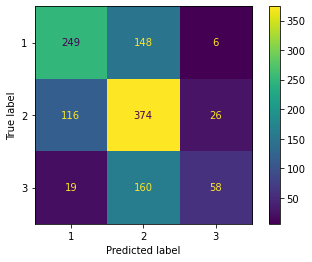


Perceptró:
              precision    recall  f1-score   support

           1       0.49      0.90      0.63       403
           2       0.54      0.34      0.42       516
           3       0.48      0.17      0.25       237

    accuracy                           0.50      1156
   macro avg       0.50      0.47      0.43      1156
weighted avg       0.51      0.50      0.46      1156

training accuracy: 50.59510928370483
testing accuracy: 50.17301038062284

Confusion Matrix


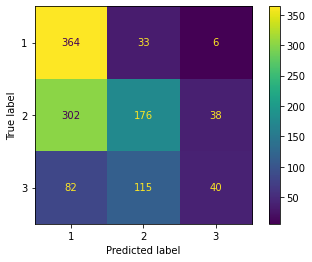


Random Forest:
              precision    recall  f1-score   support

           1       0.79      0.79      0.79       403
           2       0.71      0.77      0.74       516
           3       0.78      0.62      0.69       237

    accuracy                           0.75      1156
   macro avg       0.76      0.73      0.74      1156
weighted avg       0.75      0.75      0.75      1156

training accuracy: 100.0
testing accuracy: 74.91349480968859

Confusion Matrix


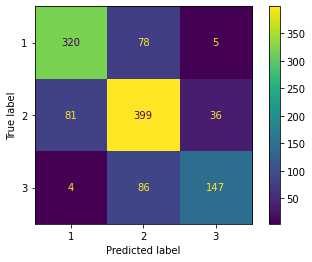

In [34]:
df_menor_LogReg = df.drop(pitjorLogReg,axis=1)

RegressioLogistica(df_menor_LogReg, "menor imp. LogReg")
Perceptro(df_menor_LogReg, "menor imp. LogReg")
RandomForest(df_menor_LogReg, "menor imp. LogReg")

dfComentaris.at["menor imp. LogReg",'Comentaris']=pitjorLogReg

### Característica de menor importància del Perceptró

Com s'ha observat [aquí](#Perceptro), el Feature Selection del Perceptró indica que és la característica amb menys importància.


Regressio Logística:
              precision    recall  f1-score   support

           1       0.66      0.67      0.67       403
           2       0.56      0.69      0.62       516
           3       0.60      0.27      0.37       237

    accuracy                           0.60      1156
   macro avg       0.61      0.54      0.55      1156
weighted avg       0.60      0.60      0.58      1156

training accuracy: 57.433455961913005
testing accuracy: 59.86159169550172

Confusion Matrix


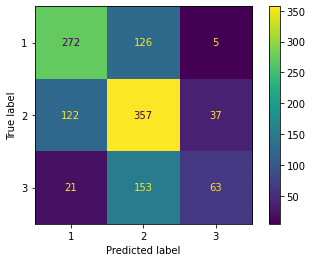


Perceptró:
              precision    recall  f1-score   support

           1       0.44      0.95      0.60       403
           2       0.61      0.04      0.07       516
           3       0.46      0.47      0.47       237

    accuracy                           0.45      1156
   macro avg       0.50      0.49      0.38      1156
weighted avg       0.52      0.45      0.34      1156

training accuracy: 44.66565678424583
testing accuracy: 44.636678200692046

Confusion Matrix


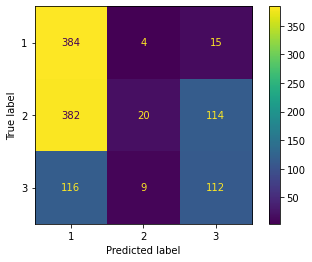


Random Forest:
              precision    recall  f1-score   support

           1       0.77      0.78      0.78       403
           2       0.69      0.74      0.72       516
           3       0.76      0.62      0.68       237

    accuracy                           0.73      1156
   macro avg       0.74      0.72      0.73      1156
weighted avg       0.73      0.73      0.73      1156

training accuracy: 100.0
testing accuracy: 73.26989619377161

Confusion Matrix


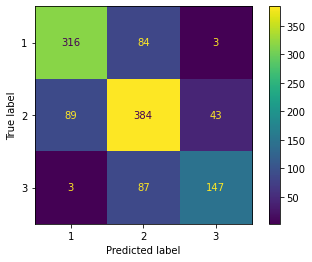

In [35]:
df_menor_Perc = df.drop(pitjorPerc,axis=1)

RegressioLogistica(df_menor_Perc, "menor imp. Perc")
Perceptro(df_menor_Perc, "menor imp. Perc")
RandomForest(df_menor_Perc, "menor imp. Perc")

dfComentaris.at["menor imp. Perc",'Comentaris']=pitjorPerc

### Característica de menor importància del Random Forest

Com s'ha observat [aquí](#Random-Forest), el Feature Selection del Random Forest indica que és la característica amb menys importància.


Regressio Logística:
              precision    recall  f1-score   support

           1       0.66      0.66      0.66       403
           2       0.56      0.70      0.62       516
           3       0.60      0.27      0.38       237

    accuracy                           0.60      1156
   macro avg       0.61      0.54      0.55      1156
weighted avg       0.60      0.60      0.58      1156

training accuracy: 57.996104739233935
testing accuracy: 59.602076124567475

Confusion Matrix


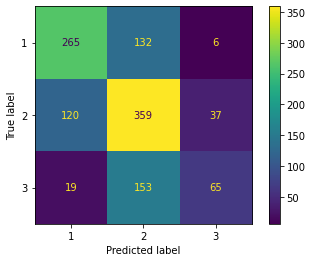


Perceptró:
              precision    recall  f1-score   support

           1       0.47      0.92      0.62       403
           2       0.66      0.20      0.31       516
           3       0.52      0.46      0.49       237

    accuracy                           0.51      1156
   macro avg       0.55      0.53      0.47      1156
weighted avg       0.56      0.51      0.45      1156

training accuracy: 47.50054100843973
testing accuracy: 50.51903114186851

Confusion Matrix


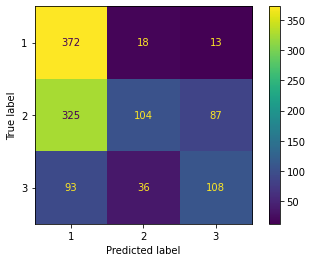


Random Forest:
              precision    recall  f1-score   support

           1       0.77      0.79      0.78       403
           2       0.70      0.75      0.73       516
           3       0.77      0.63      0.70       237

    accuracy                           0.74      1156
   macro avg       0.75      0.72      0.73      1156
weighted avg       0.74      0.74      0.74      1156

training accuracy: 100.0
testing accuracy: 74.0484429065744

Confusion Matrix


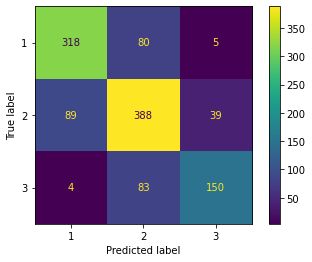

In [36]:
df_menor_RF = df.drop(pitjorRF,axis=1)

RegressioLogistica(df_menor_RF, "menor imp. RF")
Perceptro(df_menor_RF, "menor imp. RF")
RandomForest(df_menor_RF, "menor imp. RF")

dfComentaris.at["menor imp. RF",'Comentaris']=pitjorRF

### Característica amb les pitjors correlacions amb la qualitat

Com s'ha observat [aquí](#Correlacions-Minimes), són les tres característiques menys correlacionades amb la qualitat.


Regressio Logística:
              precision    recall  f1-score   support

           1       0.65      0.67      0.66       403
           2       0.55      0.68      0.61       516
           3       0.60      0.26      0.36       237

    accuracy                           0.59      1156
   macro avg       0.60      0.53      0.54      1156
weighted avg       0.59      0.59      0.57      1156

training accuracy: 56.784245834235016
testing accuracy: 58.82352941176471

Confusion Matrix


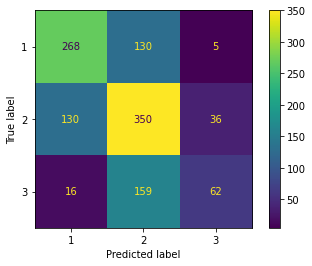


Perceptró:
              precision    recall  f1-score   support

           1       0.61      0.30      0.40       403
           2       0.46      0.78      0.58       516
           3       0.44      0.15      0.22       237

    accuracy                           0.48      1156
   macro avg       0.50      0.41      0.40      1156
weighted avg       0.51      0.48      0.44      1156

training accuracy: 49.98917983120536
testing accuracy: 48.35640138408305

Confusion Matrix


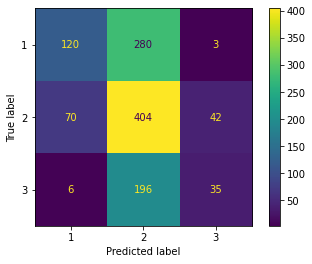


Random Forest:
              precision    recall  f1-score   support

           1       0.75      0.73      0.74       403
           2       0.66      0.73      0.70       516
           3       0.73      0.60      0.66       237

    accuracy                           0.71      1156
   macro avg       0.72      0.69      0.70      1156
weighted avg       0.71      0.71      0.71      1156

training accuracy: 100.0
testing accuracy: 70.67474048442907

Confusion Matrix


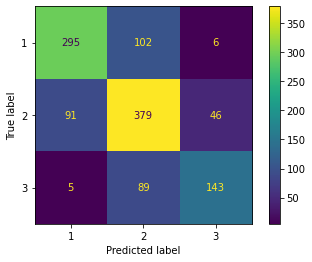

In [37]:
df_Correlacions = df.drop(pitjorsCorrelacions,axis=1)

RegressioLogistica(df_Correlacions, "Pitjors carac. Correlacions")
Perceptro(df_Correlacions, "Pitjors carac. Correlacions")
RandomForest(df_Correlacions, "Pitjors carac. Correlacions")

dfComentaris.at["Pitjors carac. Correlacions",'Comentaris']=pitjorsCorrelacions

### Característica amb les pitjors característiques del Forward Feature Selection

Com s'ha observat [aquí](#Sequential-Feature-Selector), ja que el Forward Feature Selection indica que són les dues pitjors característiques.


Regressio Logística:
              precision    recall  f1-score   support

           1       0.66      0.66      0.66       403
           2       0.56      0.70      0.62       516
           3       0.61      0.28      0.39       237

    accuracy                           0.60      1156
   macro avg       0.61      0.55      0.56      1156
weighted avg       0.61      0.60      0.59      1156

training accuracy: 57.97446440164467
testing accuracy: 59.94809688581315

Confusion Matrix


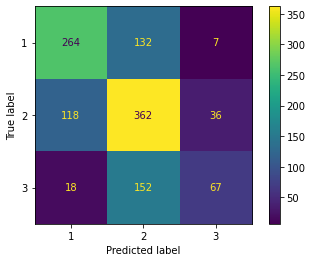


Perceptró:
              precision    recall  f1-score   support

           1       0.57      0.77      0.66       403
           2       0.60      0.25      0.35       516
           3       0.41      0.68      0.51       237

    accuracy                           0.52      1156
   macro avg       0.53      0.57      0.51      1156
weighted avg       0.55      0.52      0.49      1156

training accuracy: 49.9675394936161
testing accuracy: 52.24913494809689

Confusion Matrix


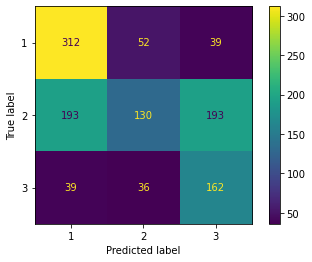


Random Forest:
              precision    recall  f1-score   support

           1       0.77      0.80      0.78       403
           2       0.71      0.74      0.73       516
           3       0.77      0.64      0.70       237

    accuracy                           0.74      1156
   macro avg       0.75      0.73      0.74      1156
weighted avg       0.74      0.74      0.74      1156

training accuracy: 100.0
testing accuracy: 74.13494809688581

Confusion Matrix


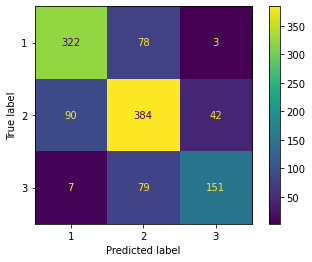

In [38]:
df_SFSF = df.drop(pitjorSFSF,axis=1)

RegressioLogistica(df_SFSF, "Pitjors carac. SFSF")
Perceptro(df_SFSF, "Pitjors carac. SFSF")
RandomForest(df_SFSF, "Pitjors carac. SFSF")

dfComentaris.at["Pitjors carac. SFSF",'Comentaris']=pitjorSFSF

### Pitjors característiques Backward Feature Selection

Com s'ha observat [aquí](#Sequential-Feature-Selector), el Backward Feature Selection indica que són les dues pitjors característiques.


Regressio Logística:
              precision    recall  f1-score   support

           1       0.66      0.69      0.67       403
           2       0.57      0.69      0.62       516
           3       0.61      0.29      0.39       237

    accuracy                           0.61      1156
   macro avg       0.61      0.55      0.56      1156
weighted avg       0.61      0.61      0.59      1156

training accuracy: 57.8229820385198
testing accuracy: 60.6401384083045

Confusion Matrix


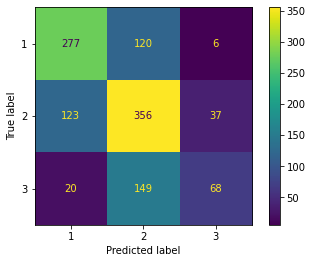


Perceptró:
              precision    recall  f1-score   support

           1       0.53      0.86      0.65       403
           2       0.52      0.13      0.20       516
           3       0.40      0.64      0.49       237

    accuracy                           0.49      1156
   macro avg       0.49      0.54      0.45      1156
weighted avg       0.50      0.49      0.42      1156

training accuracy: 48.04154944817139
testing accuracy: 48.702422145328725

Confusion Matrix


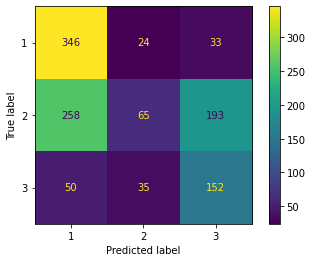


Random Forest:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       403
           2       0.71      0.76      0.73       516
           3       0.78      0.66      0.71       237

    accuracy                           0.75      1156
   macro avg       0.76      0.73      0.74      1156
weighted avg       0.75      0.75      0.75      1156

training accuracy: 100.0
testing accuracy: 74.65397923875432

Confusion Matrix


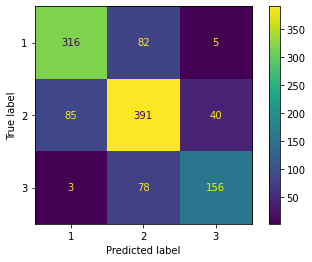

In [39]:
df_SFSB = df.drop(pitjorSFSB,axis=1)

RegressioLogistica(df_SFSB, "Pitjors carac. SFSB")
Perceptro(df_SFSB, "Pitjors carac. SFSB")
RandomForest(df_SFSB, "Pitjors carac. SFSB")

dfComentaris.at["Pitjors carac. SFSB",'Comentaris']=pitjorSFSB

### Pitjors característiques Univariate Feature Selection

Com s'ha observat [aquí](#Univariate-feature-selection), el SelectKBest indica que són les dues pitjors característiques.


Regressio Logística:
              precision    recall  f1-score   support

           1       0.66      0.68      0.67       403
           2       0.56      0.69      0.62       516
           3       0.59      0.27      0.37       237

    accuracy                           0.60      1156
   macro avg       0.60      0.54      0.55      1156
weighted avg       0.60      0.60      0.58      1156

training accuracy: 57.10885089807402
testing accuracy: 59.86159169550172

Confusion Matrix


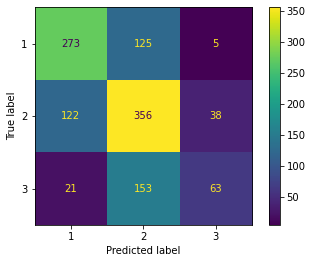


Perceptró:
              precision    recall  f1-score   support

           1       0.38      0.99      0.55       403
           2       0.36      0.02      0.03       516
           3       0.55      0.16      0.24       237

    accuracy                           0.39      1156
   macro avg       0.43      0.39      0.27      1156
weighted avg       0.40      0.39      0.25      1156

training accuracy: 40.0562648777321
testing accuracy: 38.581314878892734

Confusion Matrix


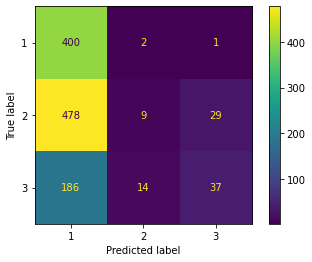


Random Forest:
              precision    recall  f1-score   support

           1       0.75      0.76      0.76       403
           2       0.68      0.74      0.71       516
           3       0.76      0.61      0.68       237

    accuracy                           0.72      1156
   macro avg       0.73      0.70      0.71      1156
weighted avg       0.72      0.72      0.72      1156

training accuracy: 100.0
testing accuracy: 71.97231833910035

Confusion Matrix


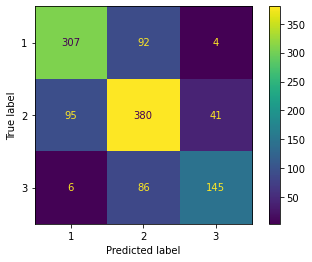

In [40]:
df_UFS = df.drop(pitjorsUFS,axis=1)

RegressioLogistica(df_UFS, "Pitjors carac. UFS")
Perceptro(df_UFS, "Pitjors carac. UFS")
RandomForest(df_UFS, "Pitjors carac. UFS")

dfComentaris.at["Pitjors carac. UFS",'Comentaris']=pitjorsUFS

### Pitjors característiques Recursive Feature Selection

Com hem vist [aquí](#Recursive-feature-elimination), el Recursive Feature Elimination indica que són les dues pitjors característiques.


Regressio Logística:
              precision    recall  f1-score   support

           1       0.66      0.69      0.67       403
           2       0.57      0.69      0.62       516
           3       0.61      0.29      0.39       237

    accuracy                           0.61      1156
   macro avg       0.61      0.55      0.56      1156
weighted avg       0.61      0.61      0.59      1156

training accuracy: 57.8229820385198
testing accuracy: 60.6401384083045

Confusion Matrix


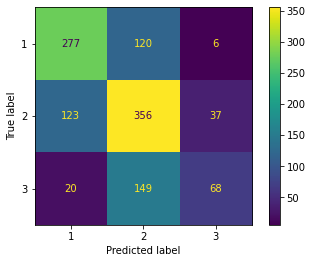


Perceptró:
              precision    recall  f1-score   support

           1       0.53      0.86      0.65       403
           2       0.52      0.13      0.20       516
           3       0.40      0.64      0.49       237

    accuracy                           0.49      1156
   macro avg       0.49      0.54      0.45      1156
weighted avg       0.50      0.49      0.42      1156

training accuracy: 48.04154944817139
testing accuracy: 48.702422145328725

Confusion Matrix


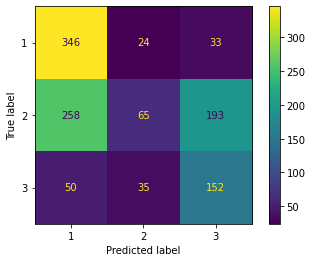


Random Forest:
              precision    recall  f1-score   support

           1       0.77      0.77      0.77       403
           2       0.69      0.74      0.72       516
           3       0.73      0.60      0.66       237

    accuracy                           0.72      1156
   macro avg       0.73      0.71      0.72      1156
weighted avg       0.73      0.72      0.72      1156

training accuracy: 100.0
testing accuracy: 72.49134948096886

Confusion Matrix


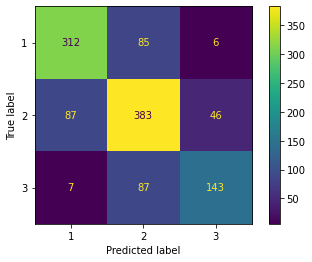

In [41]:
df_RFE = df.drop(pitjorsRFE,axis=1)

RegressioLogistica(df_RFE, "Pitjors carac. RFE")
Perceptro(df_RFE, "Pitjors carac. RFE")
RandomForest(df_RFE, "Pitjors carac. RFE")

dfComentaris.at["Pitjors carac. RFE",'Comentaris']=pitjorsRFE

## Cream característiques

Per crear les característiques noves hem emprat l'eina MathematicalCombinator que ens permet crear noves columnes/variables a partir d'operacions i combinacions d'altres. Per decidir quines característiques crear o no ens hem basat, principalment, en la correlació que hi ha entre aquestes característiques i el nostre criteri segons el vist anteriorment.

### Àcids totals

Com tenim l'acidesa fixada i la volàtil, provarem de crear una de nova característica que sigui la total


Regressio Logística:
              precision    recall  f1-score   support

           1       0.65      0.67      0.66       403
           2       0.56      0.69      0.62       516
           3       0.61      0.28      0.39       237

    accuracy                           0.60      1156
   macro avg       0.61      0.55      0.55      1156
weighted avg       0.60      0.60      0.58      1156

training accuracy: 57.671499675394934
testing accuracy: 59.77508650519031

Confusion Matrix


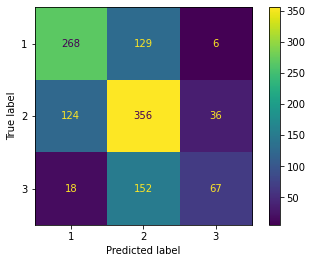


Perceptró:
              precision    recall  f1-score   support

           1       0.41      0.96      0.58       403
           2       0.60      0.10      0.18       516
           3       0.56      0.31      0.40       237

    accuracy                           0.44      1156
   macro avg       0.52      0.46      0.38      1156
weighted avg       0.53      0.44      0.36      1156

training accuracy: 45.07682319844189
testing accuracy: 44.463667820069205

Confusion Matrix


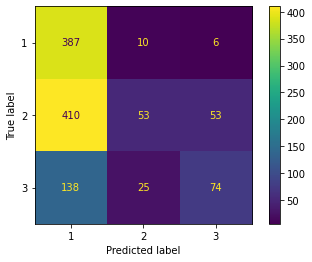


Random Forest:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       403
           2       0.71      0.77      0.74       516
           3       0.78      0.64      0.70       237

    accuracy                           0.75      1156
   macro avg       0.76      0.73      0.74      1156
weighted avg       0.75      0.75      0.75      1156

training accuracy: 100.0
testing accuracy: 74.65397923875432

Confusion Matrix


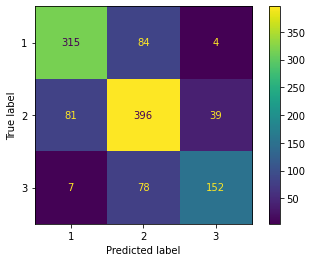

In [42]:
combinator_Acid_Tot = MathematicalCombination(
    variables_to_combine=['fixed acidity', 'volatile acidity'],
    math_operations = ['sum'],
    new_variables_names = ['total_acidity']
)

df_Acid_Tot = combinator_Acid_Tot.fit_transform(df)

RegressioLogistica(df_Acid_Tot, "Acid Totals")
Perceptro(df_Acid_Tot, "Acid Totals")
RandomForest(df_Acid_Tot, "Acid Totals")

### Percentatge d'àcid cítric respecte de l'acidesa fixada

L'àcid cítric està inclòs dins l'acidesa fixada, així que crearem una nova característica que sigui el percentatge d'àcid cítric respecte de la fixada.


Regressio Logística:
              precision    recall  f1-score   support

           1       0.66      0.67      0.66       403
           2       0.56      0.69      0.62       516
           3       0.62      0.28      0.38       237

    accuracy                           0.60      1156
   macro avg       0.61      0.55      0.56      1156
weighted avg       0.61      0.60      0.59      1156

training accuracy: 57.93118372646613
testing accuracy: 59.94809688581315

Confusion Matrix


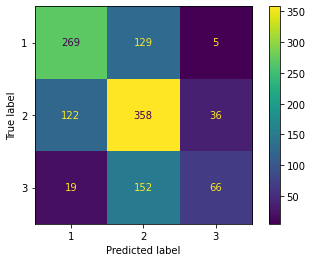


Perceptró:
              precision    recall  f1-score   support

           1       0.36      1.00      0.53       403
           2       0.55      0.02      0.04       516
           3       0.62      0.06      0.11       237

    accuracy                           0.37      1156
   macro avg       0.51      0.36      0.23      1156
weighted avg       0.50      0.37      0.23      1156

training accuracy: 38.541441246483444
testing accuracy: 36.937716262975776

Confusion Matrix


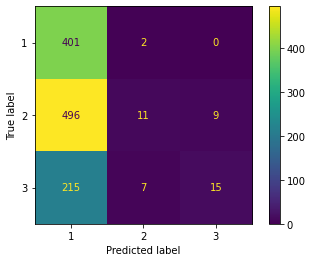


Random Forest:
              precision    recall  f1-score   support

           1       0.77      0.79      0.78       403
           2       0.70      0.73      0.71       516
           3       0.75      0.63      0.68       237

    accuracy                           0.73      1156
   macro avg       0.74      0.72      0.73      1156
weighted avg       0.73      0.73      0.73      1156

training accuracy: 100.0
testing accuracy: 73.09688581314879

Confusion Matrix


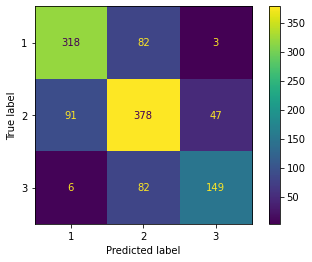

In [43]:
combinator_PercAC = CombineWithReferenceFeature(
    variables_to_combine=['citric acid'],
    reference_variables=['fixed acidity'],
    operations=['div'],   
    new_variables_names=['percentage_citric_acid'])

df_PercAC = combinator_PercAC.fit_transform(df)

RegressioLogistica(df_PercAC, "Perc. acid citric")
Perceptro(df_PercAC, "Perc. acid citric")
RandomForest(df_PercAC, "Perc. acid citric")

### Minerals totals

Com tenim els sulfats i els clorurs que ambdós són minerals, cream una nova caraterística anomenada minerals totals que representi la seva suma


Regressio Logística:
              precision    recall  f1-score   support

           1       0.65      0.67      0.66       403
           2       0.56      0.69      0.62       516
           3       0.61      0.28      0.39       237

    accuracy                           0.60      1156
   macro avg       0.61      0.55      0.55      1156
weighted avg       0.60      0.60      0.58      1156

training accuracy: 57.80134170093053
testing accuracy: 59.688581314878896

Confusion Matrix


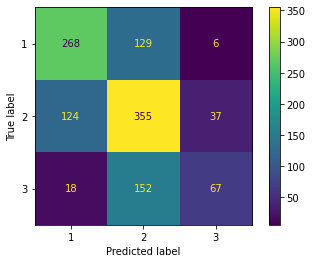


Perceptró:
              precision    recall  f1-score   support

           1       0.57      0.71      0.63       403
           2       0.53      0.64      0.58       516
           3       0.67      0.08      0.14       237

    accuracy                           0.55      1156
   macro avg       0.59      0.48      0.45      1156
weighted avg       0.57      0.55      0.51      1156

training accuracy: 53.53819519584505
testing accuracy: 54.93079584775087

Confusion Matrix


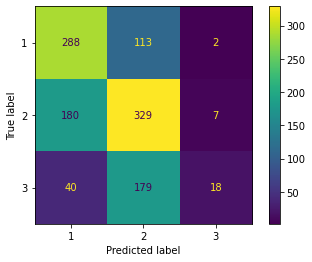


Random Forest:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       403
           2       0.69      0.75      0.72       516
           3       0.75      0.62      0.68       237

    accuracy                           0.73      1156
   macro avg       0.74      0.72      0.73      1156
weighted avg       0.73      0.73      0.73      1156

training accuracy: 100.0
testing accuracy: 73.26989619377161

Confusion Matrix


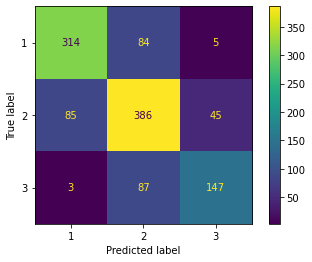

In [44]:
combinator_Minerals_Totals = MathematicalCombination(
    variables_to_combine=['chlorides', 'sulphates'],
    math_operations = ['sum'],
    new_variables_names = ['total_minerals']
)

df_Minerals_Totals = combinator_Minerals_Totals.fit_transform(df)

RegressioLogistica(df_Minerals_Totals, "Minerals totals")
Perceptro(df_Minerals_Totals, "Minerals totals")
RandomForest(df_Minerals_Totals, "Minerals totals")

### Percentatge de diòxid de sofre lliure

El SO2 lliure i el SO2 total són les dues característiques més relacionades així que cream una nova amb aquestes dues que sigui el percentatge de SO2 lliure respecte al total


Regressio Logística:
              precision    recall  f1-score   support

           1       0.67      0.69      0.68       403
           2       0.57      0.69      0.62       516
           3       0.61      0.28      0.38       237

    accuracy                           0.61      1156
   macro avg       0.61      0.55      0.56      1156
weighted avg       0.61      0.61      0.59      1156

training accuracy: 58.10430642718026
testing accuracy: 60.553633217993074

Confusion Matrix


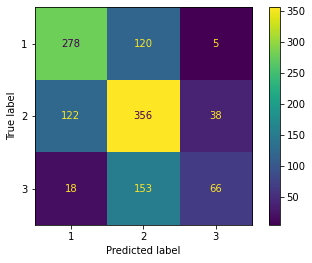


Perceptró:
              precision    recall  f1-score   support

           1       0.48      0.86      0.62       403
           2       0.53      0.45      0.48       516
           3       0.00      0.00      0.00       237

    accuracy                           0.50      1156
   macro avg       0.34      0.43      0.37      1156
weighted avg       0.40      0.50      0.43      1156

training accuracy: 50.14066219433023
testing accuracy: 49.82698961937716

Confusion Matrix


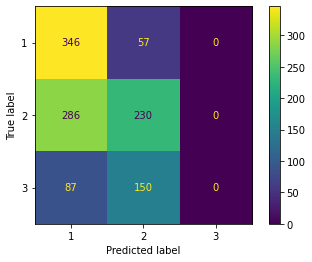


Random Forest:
              precision    recall  f1-score   support

           1       0.78      0.79      0.79       403
           2       0.71      0.77      0.74       516
           3       0.78      0.61      0.69       237

    accuracy                           0.74      1156
   macro avg       0.76      0.72      0.74      1156
weighted avg       0.75      0.74      0.74      1156

training accuracy: 100.0
testing accuracy: 74.48096885813149

Confusion Matrix


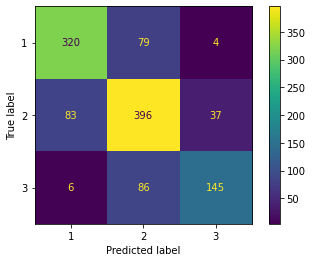

In [45]:
combinator_PercSO2 = CombineWithReferenceFeature(
    variables_to_combine=['free sulfur dioxide'],
    reference_variables=['total sulfur dioxide'],
    operations=['div'],   
    new_variables_names=['percentage_free_sulfur'])

df_PercSO2 = combinator_PercSO2.fit_transform(df)

RegressioLogistica(df_PercSO2, "Perc. SO2 lliure")
Perceptro(df_PercSO2, "Perc. SO2 lliure")
RandomForest(df_PercSO2, "Perc. SO2 lliure")

### Diòxid de sofre no lliure

Parescut a l'anterior apartat, aquí cream una nova característica que és el SO2 no lliure


Regressio Logística:
              precision    recall  f1-score   support

           1       0.65      0.67      0.66       403
           2       0.56      0.69      0.62       516
           3       0.62      0.29      0.39       237

    accuracy                           0.60      1156
   macro avg       0.61      0.55      0.56      1156
weighted avg       0.61      0.60      0.59      1156

training accuracy: 57.6931400129842
testing accuracy: 59.94809688581315

Confusion Matrix


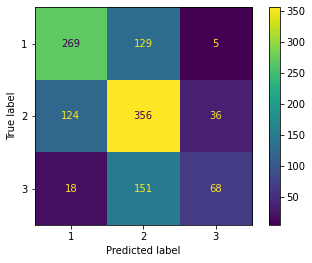


Perceptró:
              precision    recall  f1-score   support

           1       0.41      0.96      0.58       403
           2       0.70      0.04      0.07       516
           3       0.48      0.39      0.43       237

    accuracy                           0.43      1156
   macro avg       0.53      0.46      0.36      1156
weighted avg       0.56      0.43      0.32      1156

training accuracy: 43.259034840943514
testing accuracy: 43.0795847750865

Confusion Matrix


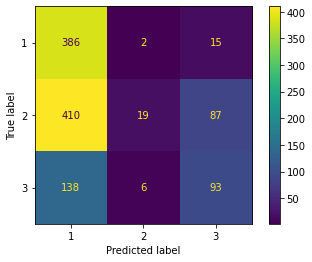


Random Forest:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       403
           2       0.70      0.76      0.73       516
           3       0.78      0.63      0.70       237

    accuracy                           0.74      1156
   macro avg       0.75      0.73      0.74      1156
weighted avg       0.75      0.74      0.74      1156

training accuracy: 100.0
testing accuracy: 74.30795847750865

Confusion Matrix


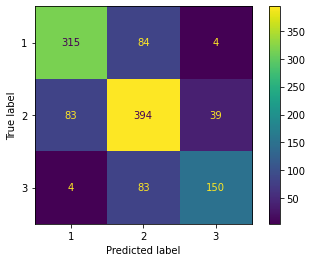

In [46]:
combinator_No_FreeSO2 = CombineWithReferenceFeature(
    variables_to_combine=['total sulfur dioxide'],
    reference_variables=['free sulfur dioxide'],
    operations=['sub'],
    new_variables_names=['non_free_sulfur_dioxide']
)

df_No_FreeSO2 = combinator_No_FreeSO2.fit_transform(df)

RegressioLogistica(df_No_FreeSO2, "S02 no lliure")
Perceptro(df_No_FreeSO2, "S02 no lliure")
RandomForest(df_No_FreeSO2, "S02 no lliure")


### Unim totes les creacions

Juntarem totes les característiques creades en un sol dataframe


Regressio Logística:
              precision    recall  f1-score   support

           1       0.66      0.68      0.67       403
           2       0.56      0.69      0.62       516
           3       0.61      0.28      0.38       237

    accuracy                           0.60      1156
   macro avg       0.61      0.55      0.56      1156
weighted avg       0.61      0.60      0.59      1156

training accuracy: 58.10430642718026
testing accuracy: 60.38062283737025

Confusion Matrix


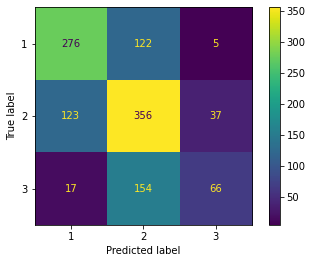


Perceptró:
              precision    recall  f1-score   support

           1       0.52      0.84      0.64       403
           2       0.53      0.24      0.33       516
           3       0.44      0.49      0.47       237

    accuracy                           0.50      1156
   macro avg       0.50      0.53      0.48      1156
weighted avg       0.51      0.50      0.47      1156

training accuracy: 50.530188270937025
testing accuracy: 50.17301038062284

Confusion Matrix


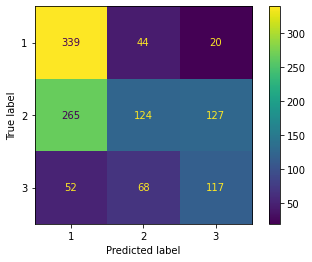


Random Forest:
              precision    recall  f1-score   support

           1       0.78      0.79      0.79       403
           2       0.70      0.77      0.73       516
           3       0.79      0.62      0.69       237

    accuracy                           0.74      1156
   macro avg       0.76      0.73      0.74      1156
weighted avg       0.75      0.74      0.74      1156

training accuracy: 100.0
testing accuracy: 74.48096885813149

Confusion Matrix


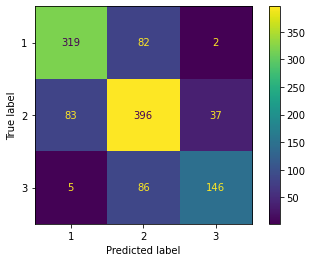

In [47]:
df_Unió = combinator_Acid_Tot.fit_transform(df)
df_Unió = combinator_Minerals_Totals.fit_transform(df_Unió)
df_Unió = combinator_PercAC.fit_transform(df_Unió)
df_Unió = combinator_No_FreeSO2.fit_transform(df_Unió)
df_Unió = combinator_PercSO2.fit_transform(df_Unió)

RegressioLogistica(df_Unió, "Totes creacions")
Perceptro(df_Unió, "Totes creacions")
RandomForest(df_Unió, "Totes creacions")

## Comparam les precisions i conclusions

En aquest apartat feim un print de l'*accuracy* de tots les versions del dataframes per poder comparar-les. També calcularem la diferència de cada variació amb l'original.

In [48]:
print("Training accuracy for each model and each dataframe\n", dfTrainAccuracy)
print("\nTesting accuracy for each model and each dataframe\n", dfTestAccuracy)
print("\n\nLes features eliminades han estat:\n", dfComentaris)

Training accuracy for each model and each dataframe
                             Regressió Logística  Perceptró Random Forest
Original                              57.736421  47.587102         100.0
menor imp. LogReg                     56.979009  50.595109         100.0
menor imp. Perc                       57.433456  44.665657         100.0
menor imp. RF                         57.996105  47.500541         100.0
Pitjors carac. Correlacions           56.784246   49.98918         100.0
Pitjors carac. SFSF                   57.974464  49.967539         100.0
Pitjors carac. SFSB                   57.822982  48.041549         100.0
Pitjors carac. UFS                    57.108851  40.056265         100.0
Pitjors carac. RFE                    57.822982  48.041549         100.0
Acid Totals                             57.6715  45.076823         100.0
Perc. acid citric                     57.931184  38.541441         100.0
Minerals totals                       57.801342  53.538195         100.

In [49]:
dfDiffs = pd.DataFrame(columns=['Regressió Logística','Perceptró','Random Forest'])
for index, row in dfTestAccuracy.iterrows():
    dfDiffs.at[row.name]=row-dfTestAccuracy.loc['Original']
dfDiffs['Media'] = dfDiffs.mean(axis=1)
print(dfDiffs)

                            Regressió Logística  Perceptró Random Forest  \
Original                                    0.0        0.0           0.0   
menor imp. LogReg                     -0.778547   1.470588      1.903114   
menor imp. Perc                         0.17301  -4.065744      0.259516   
menor imp. RF                         -0.086505   1.816609      1.038062   
Pitjors carac. Correlacions           -0.865052  -0.346021      -2.33564   
Pitjors carac. SFSF                    0.259516   3.546713      1.124567   
Pitjors carac. SFSB                    0.951557        0.0      1.643599   
Pitjors carac. UFS                      0.17301 -10.121107     -1.038062   
Pitjors carac. RFE                     0.951557        0.0     -0.519031   
Acid Totals                            0.086505  -4.238754      1.643599   
Perc. acid citric                      0.259516 -11.764706      0.086505   
Minerals totals                             0.0   6.228374      0.259516   
Perc. SO2 ll

Com podem veure, les precisions dels models no han millorat gaire després d'aplicar els diferents processos de l'enginenyeria de característiques. Fins i tot n'hi ha algunes que han empitjorat. 

- **Regressió Logística** \
        Pel que fa a les diferències de la Regressió Logística, podem observar que no han estat gaire significatives. Cap modificació a les característiques ha fet millorar ni empitjorar l'*accuracy* més d'un 1% i, en algunes, inclús s'ha mantingut exactament igual.
- **Perceptró**\
        El Perceptró és el model que més es veu afectat per aquestes noves característiques. La que més millora l'*accuracy* és la característica **Minerals totals**, amb un 6.22%, mentre que la pitjor és el  **Percentatge d'àcid cítric**, amb un decrement del 11% de la *accuracy*.

- **Random Forest**\
        Per acabar, el Random Forest no millora ni empitjora significativament, simplement té canvis en l'*accuracy* d'un màxim del 2% en valor absolut.

Un pic feta la mitjana, podem observar que la característica que presenta una major millora és la de **Minerals totals**, i és la que emprarem per realitzar el *Grid Search*.

# **Grid Search CV**

El Grid Search és una tècnica que ens permet determinar els valors òptims dels hiperparàmetres d'un model. L'emprarem per poder millorar els nostres models. 

_(No acabam de saber que fan exactament tots els hyperparàmetres dels models, així que hem escollit un parell de cada model fora saber ben bé que fan)_

Farem feina amb el grid search damunt el dataframe: df_Minerals_Totals ja que com hem vist abans tenia la millor accuracy. No cream un conjunt de dades de validació ja que el grid search ho fa internament.

In [51]:
features, labels = load_data(df_Minerals_Totals)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Regressió Logística

Pel Grid Search de la Regressió Lògistica avaluarem els següents paràmetres:
- **Penalty**: Penalització per augmentar la magnitud dels valors dels paràmetres per reduir l'*overfitting*
    - 'l2': Penalització l2
    - 'l1': Penalització l1
- **C**: Inversa de la força de regularització
- **max_iter**: Nombre màxim d'iteracions que triga el solucionador en convergir

In [52]:
param_grid={
    "C":np.logspace(-3,3,7),
    "penalty":["l1","l2"],
    "max_iter":[75,100,200,300]}

# Create a based model
logreg = LogisticRegression()
# Instantiate the grid search model
grid_search_logreg = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 10, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

print(grid_search_logreg.best_params_)

{'C': 0.1, 'max_iter': 75, 'penalty': 'l2'}


C:\Users\sanso\miniconda3\envs\ml-environment\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
280 fits failed out of a total of 560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sanso\miniconda3\envs\ml-environment\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sanso\miniconda3\envs\ml-environment\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sanso\miniconda3\envs\ml-environment\lib\site-packages\sk


Logistic Regression:
              precision    recall  f1-score   support

           1       0.65      0.67      0.66       403
           2       0.56      0.69      0.62       516
           3       0.61      0.28      0.39       237

    accuracy                           0.60      1156
   macro avg       0.61      0.55      0.55      1156
weighted avg       0.60      0.60      0.58      1156

training accuracy: 57.86626271369833
testing accuracy: 59.77508650519031

Confusion Matrix


C:\Users\sanso\miniconda3\envs\ml-environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


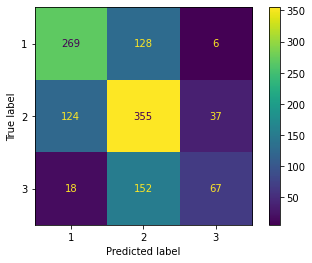


Logistic Regression:
              precision    recall  f1-score   support

           1       0.65      0.68      0.66       403
           2       0.55      0.72      0.62       516
           3       0.65      0.18      0.28       237

    accuracy                           0.59      1156
   macro avg       0.62      0.53      0.52      1156
weighted avg       0.61      0.59      0.57      1156

training accuracy: 57.8879030512876
testing accuracy: 59.34256055363322

Confusion Matrix


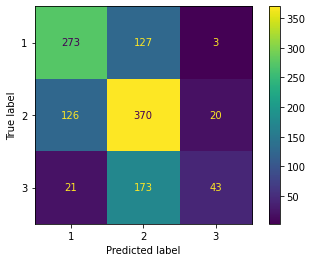

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_predict=logreg.predict(X_test)

print("\nLogistic Regression:")
print(classification_report(y_test, y_predict,zero_division=0))

training_accuracy = logreg.score(X_train,y_train)
testing_accuracy = logreg.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=logreg.classes_), display_labels=logreg.classes_).plot()  
plt.show()

#---------------------------------------------------------------------------

logregTunnedParams = logreg.set_params(**grid_search_logreg.best_params_)
logregTunnedParams.fit(X_train, y_train)

y_predict=logregTunnedParams.predict(X_test)

print("\nLogistic Regression:")
print(classification_report(y_test, y_predict,zero_division=0))

training_accuracy = logregTunnedParams.score(X_train,y_train)
testing_accuracy = logregTunnedParams.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=logregTunnedParams.classes_), display_labels=logregTunnedParams.classes_).plot()  
plt.show()

## Perceptró

Pel Grid Search del Perceptró avaluarem els següents paràmetres:
- **Penalty**: Penalització per augmentar la magnitud dels valors dels paràmetres per reduir l'*overfitting*
    - 'l2': Penalització l2
    - 'l1': Penalització l1
- **Alpha**: Constant que multiplica el terme de regularització, si s'empra la regularització
- **max_iter**: Nombre màxim d'iteracions que triga el solucionador en convergir
- **early_stopping**: Si està establit a True atura l'entrenament quan el validation score deixa de millorar

In [54]:
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [75,100,1000,2500,5000],
    'early_stopping': [True, False],
}
# Create a based model
perceptro = Perceptron()
# Instantiate the grid search model
grid_search_Perc = GridSearchCV(estimator = perceptro, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_Perc.fit(X_train, y_train)

print(grid_search_Perc.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
{'alpha': 0.001, 'early_stopping': False, 'max_iter': 75, 'penalty': 'elasticnet'}


PERCEPTRON ABANS DEL GRID SEARCH:
              precision    recall  f1-score   support

           1       0.57      0.71      0.63       403
           2       0.53      0.64      0.58       516
           3       0.67      0.08      0.14       237

    accuracy                           0.55      1156
   macro avg       0.59      0.48      0.45      1156
weighted avg       0.57      0.55      0.51      1156

training accuracy: 53.53819519584505
testing accuracy: 54.93079584775087

Confusion Matrix


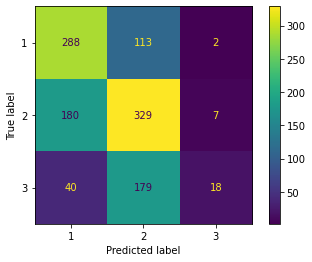

PERCEPTRON DESPRÉS DEL GRIDSEARCH:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       403
           2       0.45      1.00      0.62       516
           3       0.00      0.00      0.00       237

    accuracy                           0.45      1156
   macro avg       0.15      0.33      0.21      1156
weighted avg       0.20      0.45      0.28      1156

training accuracy: 44.27613070763904
testing accuracy: 44.550173010380625

Confusion Matrix


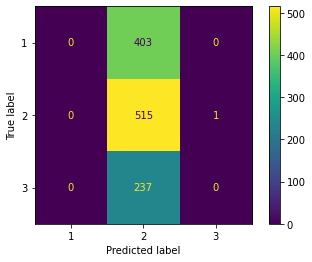

In [55]:
perc = Perceptron()
perc.fit(X_train, y_train)

y_predict=perc.predict(X_test)

print("PERCEPTRON ABANS DEL GRID SEARCH:")
print(classification_report(y_test, y_predict,zero_division=0))

training_accuracy = perc.score(X_train,y_train)
testing_accuracy = perc.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=perc.classes_), display_labels=perc.classes_).plot()  
plt.show()

#---------------------------------------------------------------------------

percTunnedParams = perc.set_params(**grid_search_Perc.best_params_)
percTunnedParams.fit(X_train, y_train)

y_predict=percTunnedParams.predict(X_test)

print("PERCEPTRON DESPRÉS DEL GRIDSEARCH:")
print(classification_report(y_test, y_predict,zero_division=0))

training_accuracy = percTunnedParams.score(X_train,y_train)
testing_accuracy = percTunnedParams.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=percTunnedParams.classes_), display_labels=percTunnedParams.classes_).plot()  
plt.show()

## Random Forest

Pel Grid Search del Random Forest avaluarem els següents paràmetres:
- **max_depth**: Màxima profunditat d'un arbre
- **max_features**: Nombre de característiques a considerar quan cercam la millor divisió
    - 'auto': max_features=sqrt(n_features).
    - 'log2': max_features=log2(n_features).
    - 'None': max_features=n_features
- **n_estimators**: Nombre d'arbres en el bosc

In [56]:
param_grid={
    "n_estimators":list(range(10,101,10)),
    "max_features":['auto','log2',None],
    "max_depth":[15,20,25]
    }

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = -1)
grid_search_rf.fit(X_train, y_train)

print(grid_search_rf.best_params_)


{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}



RANDOM FOREST ABANS DEL GREEDSEARCH:
              precision    recall  f1-score   support

           1       0.79      0.78      0.78       403
           2       0.70      0.77      0.74       516
           3       0.78      0.64      0.70       237

    accuracy                           0.75      1156
   macro avg       0.76      0.73      0.74      1156
weighted avg       0.75      0.75      0.75      1156

training accuracy: 100.0
testing accuracy: 74.5674740484429

Confusion Matrix


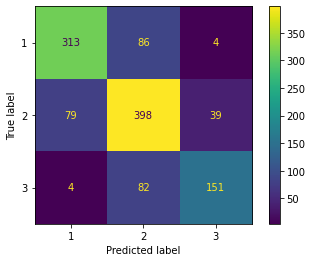


RANDOM FOREST DESPRÉS DEL GREEDSEARCH:
              precision    recall  f1-score   support

           1       0.78      0.79      0.78       403
           2       0.71      0.76      0.73       516
           3       0.77      0.63      0.69       237

    accuracy                           0.74      1156
   macro avg       0.75      0.73      0.73      1156
weighted avg       0.74      0.74      0.74      1156

training accuracy: 100.0
testing accuracy: 74.13494809688581

Confusion Matrix


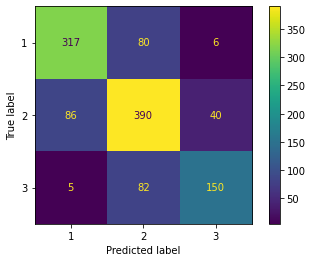

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predict=rf.predict(X_test)

print("\nRANDOM FOREST ABANS DEL GREEDSEARCH:")
print(classification_report(y_test, y_predict,zero_division=0))

training_accuracy = rf.score(X_train,y_train)
testing_accuracy = rf.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=rf.classes_), display_labels=rf.classes_).plot()  
plt.show()

#---------------------------------------------------------------------------

rfTunnedParams = rf.set_params(**grid_search_rf.best_params_)
rfTunnedParams.fit(X_train, y_train)

y_predict=rfTunnedParams.predict(X_test)

print("\nRANDOM FOREST DESPRÉS DEL GREEDSEARCH:")
print(classification_report(y_test, y_predict,zero_division=0))

training_accuracy = rfTunnedParams.score(X_train,y_train)
testing_accuracy = rfTunnedParams.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=rfTunnedParams.classes_), display_labels=rfTunnedParams.classes_).plot()  
plt.show()


## Resum

Com podem veure el model amb millors resultats és el Random Forest, amb una precisió del 74%, un *recall* del 74% i un *f1-score* del 74%. 

- El Grid Search ha calculat que els millors paràmetres per a la Regressió Logística són: C: 0.1, Max_iter: 75, Penalty: 'l2'.
    - Abans del Grid Search teniem una *accuracy* del 59.77% i després del 59.34%.
    <br/>
    <br/>
- Per al Perceptró, els millors paràmetres són: Alpha: 0.001, Early_stopping: False, Max_iter: 75, Penalty: 'elasticnet'.
    - Abans del  Grid Search teniem una *accuracy* del 54.93% i després del 44.55%.
<br/>
    <br/>
- El Grid Search ha calculat que els millors paràmetres pel Random Forest són Max_depth: 20, Max_features:'log2', n_estimators: 100
    - Abans del Grid Search teniem una *accuracy* del 74.56% i després del 74.13%.

Com es pot observar, el Grid Search no presenta cap millora significativa, i en el cas del perceptró, l'*accuracy* empitjora bastant.

# **Conclusions i resum**

Com hem pogut veure, el nostre classificador amb millor *accuracy* ha estat el Random Forest amb el DataSet de **menor imp. LogReg** (74.9%). Encara que només presenta un augment del 1,9% respecte al DataSet original.

No hem aconseguit dur a terme una millora significativa respecte al DataSet original malgrat emprar tècniques d'enginyeria de característiques i el Grid Search.

Com a observacions, podem recalcar:

- En fer la transformació de la qualitat a variable categòrica, hem pogut agrupar moltes de les mostres i això ha fet que els conjunts amb poques mostres desapareguin. Amb contrast amb la versió contínua, totes les 3 qualitats tenen un nombre semblant de mostres.

- Comparant els resultats obtinguts amb els del DataSet amb qualitats numèriques del 0 al 10, podem veure que presentam una millora general important ja que hem passat del 67.74% al 74.9%.
<br/>

En general hem après a utilitzar la llibreria Sci-kit Learn, així com aplicar de manera pràctica el vist a les classes teòriques de Machine Learning. A més, hem pogut aprendre diferents tècniques d'anàlisi de dades, tant de visualització com de modificació i transformació.\
En resum hem vist que encara que sigui "senzill" crear un model de classificació, refinar-lo i millorar la seva precisió és una tasca força difícil ja que, com s'ha pogut observar, no hi ha hagut gaire millores tant a l'apartat d'Enginyeria de Característiques com al del Grid Search.
